<h1 style="font-size: 2.5em;">한성대 AI응용학과/컴퓨터공학부</h1>
<h1 style="font-size: 2.5em;">2393084 김민상</h1>
<br><br>

<h1>머신러닝 기말 프로젝트 발표 목차</h1><br>
<p style="font-size: 1.2em;">1. 주제 선정 과정(사용 프롬프트)</p>
<p style="font-size: 1.2em;">2. 기말 프로젝트 목표</p>
<p style="font-size: 1.2em;">3. 데이터셋 설명 및 전처리</p>
<p style="font-size: 1.2em;">4. 모델 정의 및 학습</p>
<p style="font-size: 1.2em;">5. 성능 비교</p>

<h1>1. 주제 선정 과정(사용 프롬프트)</h1><br>

<img src="https://raw.githubusercontent.com/kimstitute/University/main/XGBoost_first_search.png" alt="first search" width="1000">

<p>&rArr; <b>인공신경망</b>보다 비교적 덜 익숙한 <b>인공지능 알고리즘</b>을 사용하여 과제를 진행하기로 결정</p>
<p>&rArr; <b>Kaggle 대회</b>에서 자주 사용되는 <b>XGBoost 알고리즘</b>을 이 기회에 연습하기로 결정</p>
<p>&rArr; <b>XGBoost 알고리즘</b>을 활용하기 적절한 프로젝트 주제를 <b>GPT 4o</b>에게 추천 부탁</p>
<p>&rArr; 사용할 알고리즘을 먼저 정한 다음 사용할 Dataset을 정한 것</p>

<img src="https://raw.githubusercontent.com/kimstitute/University/main/XGBoost_first_answer.png" alt="first search" width="1000">

<p>&rArr; <b>GPT 4o</b>가 추천한 주제 목록 중 한 가지를 선택</p>
<p>&rArr; <b>Kaggle</b>로 출처가 명확하고 Table 형태의 Dataset이라 <b>XGBoost 알고리즘</b> 시험 대상으로 적절하다 판단 </p>
<p>&rArr; 링크로 들어가본 <b>Dataset</b> 내용과 <b>GPT 4o</b>의 설명에 약간의 차이 발견</p>

<img src="https://raw.githubusercontent.com/kimstitute/University/main/graduate_or_college.png" alt="graduate or college" width="1000">

<p>&rArr; 대학 입학 데이터라는 <b>GPT 4o</b>의 설명과 달리 대학원 입학에 대한 데이터임을 재질문하여 확인</p>
<p>&rArr; 아이디어 구상 단계에서 생성형 AI를 활용하여 만족스러운 결과를 얻었지만, 생성된 내용의 정확도를 맹신하면 안 됨을 인지</p>

<h1>2. 기말 프로젝트 목표</h1><br>
<p style="font-size: 1.3em;">대학원 지원자들의 스펙 정보 Dataset을 통해 합격 가능성을 추론하는 XGBoost 기반 회귀 모델 구현<p>
<p>&rArr; 1. XGBoost 사용 방법 설명 가능하게 숙달하기</p>
<p>&rArr; 2. Validation Data를 나눠 학습 도중 성능을 측정하는 방법과 Cross Validation 방법으로 학습 도중 성능 측정하는 방법 비교하기</p>

<h1>3. 데이터셋 설명 및 전처리</h1><br>
<p>&rArr;사용한 Dataset(Graduate Admissions Dataset)은 인도의 대학원 지원자들의 정보와 합격 가능성을 포함한 Dataset이다.</p>

<p>&rArr;본 Dataset은 8개의 특징들을 포함한다. (Serial No. 제외)</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;1. GRE Scores ( out of 340 ) - 미국 대학원 수학 자격 시험 점수</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;2. TOEFL Scores ( out of 120 ) - 공인 영어 점수</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;3. University Rating ( out of 5 ) - 대학교 등급</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;4. Statement of Purpose - 학업 계획서 평가 점수</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;5. Letter of Recommendation Strength ( out of 5 ) - 추천서 강도</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;6. Undergraduate GPA ( out of 10 ) - 학부 학점</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;7. Research Experience ( either 0 or 1 ) - 연구 경험(1이면 있음)</p>
<p style="color:red;"><b>&nbsp;&nbsp;&nbsp;&nbsp;8. Chance of Admit ( ranging from 0 to 1 ) - 입학 가능성</b></p>


<p>&rArr;1~7번의 7개의 특징 정보를 input으로 8번 특징 Chance of Admit을 target으로 하여 학습</p> 
<p>&rArr;새로운 data를 입력 받았을 때, 입학 가능성을 출력하는 회귀 추론 모델을 만든다</p>

In [101]:
# 사용할 라이브러리 정리
# Dataset 로드/열람 위한 라이브러리들
import pandas as pd
import numpy as np

# 데이터 시각화 위한 라이브러리들
import matplotlib.pyplot as plt

# 전역 변수 지정
# 랜덤 시드를 고정해서 훈련 결과 재현성 보장
RANDOM_SEED = 10

<p>&rArr;사용할 라이브러리들을 불러오가</p>
<p>&rArr;결과 재현성을 보장하기 위해, 랜덤 시드를 고정</p>

In [102]:
# csv파일 불러오는 코드
data_frame = pd.read_csv('./Admission_Predict_Ver1.1.csv')

# 불러온 csv파일(DataFrame) 크기 보는 코드
data_frame.shape

(500, 9)

In [103]:
# data_frame의 자료형이 Pandas에서 제공하는 DataFrame임을 확인
print(type(data_frame))

<class 'pandas.core.frame.DataFrame'>


In [104]:
# 불러온 csv파일 상위 n개 행 보는 코드
data_frame.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


<p>&rArr;CSV파일로 된 Dataset을 불러오고 크기와 자료형 그리고 상위 10개 행을 출력해 확인</p>
<p>&rArr;범주형 변수가 있었다면, 전처리 과정으로 one-hot encoding이 필요했겠지만, 해당 데이터에 범주형 존재 X</p>
<p>&rArr;Research의 경우 이미 이진 변수라 one-hot encoding을 하지 않아도 됨</p>

In [105]:
# 불필요한 데이터(Serial No.열)를 제거하는 코드, axis=0이면 행을 제거
data_frame = data_frame.drop(['Serial No.'], axis=1)
data_frame.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [106]:
# csv파일(DataFrame) 크기 보는 코드
data_frame.shape

(500, 8)

<p>&rArr;학습 시 사용하지 않을 불필요한 데이터(Serial No.열)를 제거</p>
<p>&rArr;다시 Dataset의 크기를 출력해서 열이 줄어든 것 확인</p>

In [107]:
# DataFrame에 결측값이 있는지 확인하는 코드, True가 결측값을 나타낸다.
data_frame2 = data_frame.isnull()
data_frame2.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [108]:
# 각 열 별로 결측값의 개수 계산하는 코드
data_frame.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<p>&rArr;Datatset에 결측값이 존재하는지 확인하고 각 열별로 결측값 수 계산</p>
<p>&rArr;결측값이 존재하지 않는 것 확인</p>

<div>&rArr;만약, 결측값이 존재했다면<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. 결측값이 포함된 행을 삭제<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. 결측값을 평균값, 중앙값, 최빈값(범주형 데이터의 경우) 등으로 대체<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;두 방법 중 하나로 추가 전처리가 필요</div>

In [109]:
# DataFrame의 열 이름들을 반환하는 코드, 반환값은 Index 객체
data_frame.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [110]:
# 오류 예방을 위해 DataFrame의 열 이름들에서 불필요한 공백을 제거하는 코드

# 양쪽 옆의 공백 문자를 제거
data_frame.columns = data_frame.columns.str.strip()
# 문자열 중간의 공백을 언더바(_)로 대체
data_frame.columns = data_frame.columns.str.replace(" ", "_")

data_frame.head(10)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


<p>&rArr;열 이름에 공백이나 불필요한 문자 있으면 오류 발생 가능</p>
<p>&rArr;열 이름 양 끝 공백 문자 제거, 중간 공백 문자는 언더바(_)로 대체</p>

In [111]:
# DataFrame의 숫자형 데이터에 한해 통계 정보를 요약 제공하는메서드
# count: 값의 개수 (결측값 제외)
# mean: 평균
# std: 표준 편차
# min: 최솟값
# 25%: 1사분위수 (하위 25%)
# 50%: 중간값 (2사분위수 또는 중앙값)
# 75%: 3사분위수 (상위 25%)
# max: 최댓값
data_frame.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


array([[<Axes: title={'center': 'GRE_Score'}>,
        <Axes: title={'center': 'TOEFL_Score'}>,
        <Axes: title={'center': 'University_Rating'}>,
        <Axes: title={'center': 'SOP'}>],
       [<Axes: title={'center': 'LOR'}>,
        <Axes: title={'center': 'CGPA'}>,
        <Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance_of_Admit'}>]], dtype=object)

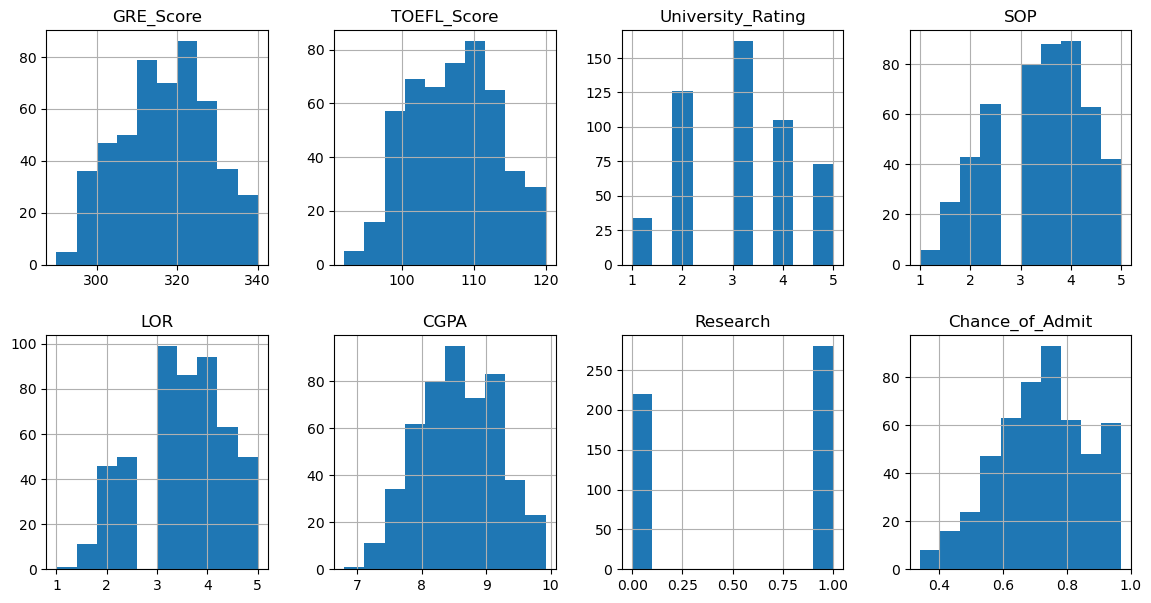

In [112]:
# 각 특징에 대한 히스토그램으로 데이터 시각화
data_frame.hist(figsize=(14, 7), bins=10, grid=True, layout=(2, 4))

<p>&rArr;(참고용)Dataset에 대한 통계와 히스토그램으로 전체적인 Data분포 확인</p>

In [113]:
# 모델 학습에서 사용하기 위해 DataFrame에서 target 변수 제거하는 코드
input_data_frame = data_frame.drop(['Chance_of_Admit'], axis=1)

input_data_frame.head(10)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
5,330,115,5,4.5,3.0,9.34,1
6,321,109,3,3.0,4.0,8.20,1
7,308,101,2,3.0,4.0,7.90,0
8,302,102,1,2.0,1.5,8.00,0
9,323,108,3,3.5,3.0,8.60,0


In [114]:
# 모델 학습에서 사용하기 위해 DataFrame에서 target 변수만 남기는 코드
target_column = data_frame['Chance_of_Admit'] # series 타입으로 반환
target_column = pd.DataFrame(target_column) 

target_column.head(10)

,Chance_of_Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
5,0.90
6,0.75
7,0.68
8,0.50
9,0.45


In [115]:
# input_data_frame의 크기 출력
print(f"{input_data_frame.shape=}")

# target_column의 크기 출력
print(f"{target_column.shape=}")

input_data_frame.shape=(500, 7)
target_column.shape=(500, 1)


<p>&rArr;Dataset에서 target 변수인 Chance of Admit을 제거하고 input data 생성</p>
<p>&rArr;Dataset에서 Chance of Admit만 뽑아내 target data 생성</p>

In [116]:
# 데이터셋 train data와 test data로 나누는 코드
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
        train_test_split(input_data_frame, target_column, test_size=0.2, random_state=RANDOM_SEED)

# 4개의 집합의 크기를 출력하는 코드
print(f"{x_train.shape=}")
print(f"{x_test.shape=}")
print(f"{y_train.shape=}")
print(f"{y_test.shape=}")

x_train.shape=(400, 7)
x_test.shape=(100, 7)
y_train.shape=(400, 1)
y_test.shape=(100, 1)


<p>&rArr;500개의 데이터셋 중 400개를 train data로, 100개를 test data로 분할</p>
<p>&rArr;전체 데이터셋의 크기가 500개로 작기 때문에 train data를 다시 나눠 Validation data를 지정하지 않음</p>
<p>&rArr;대신 Cross Validation(교차 검증) 방식을 사용하여, 성능을 검증하기로 함</p>

<h3>데이터셋 소개 및 전처리 과정 요약</h3>
<br>
<p>1. pandas로 CSV 데이터셋 파일을 불러옴</p>
<p>2. 원본 데이터셋의 크기는 (500, 9) 즉, 특징이 9개고 전체 개수는 500개</p>
<p>3. 학습에 사용하지 않을 특징 1개를 제거하여 특징 8개만 사용</p>
<p>4. 원핫 인코딩이 필요한 범주형 변수가 있는지 보고 없음을 확인</p>
<p>5. 각 열 별로 결측치가 존재하는지 확인하고 없음을 확인</p>
<p>6. 오류 방지를 위해 각 열 이름의 공백 문자를 제거</p>
<p>7. 학습에 사용할 입력 특징들과 target 특징을 분리하여, x, y데이터 생성</p>
<p>8. 전처리가 끝난 데이터셋을 train data와 test data로 분리</p>
<p>9. train data가 400개 밖에 되지 않음으로 validation data를 분리하지 않고 교차검증 방식을 사용하기로 결정</p>

<h3>Cross Validation(교차검증)이 필요한 이유 설명</h3>
<br>
<p> Q: 모델 학습 시, train data(학습 데이터)에서 validation data를 나누어 accuracy와 loss를 계산하는 이유는 무엇인가?</p>
<p> A: 학습에 사용하지 않은 validation data를 이용해, 모델의 일반화 성능을 평가하고 과적합 되기 전 학습을 중단하여(early stopping) 최적의 일반화 성능을 낼 수 있는 지점(epoch, boosting round)를 찾기 위해</p>

<img src="https://raw.githubusercontent.com/kimstitute/University/main/early_stopping.png" alt="early_stopping_graph" width="500">

<p>&rArr;일반적으로 반복이 진행되며 train loss는 줄어드는데, validation loss가 증가하는 게 일정 횟수 이상 반복되면 학습 중단</p>
<p>&rArr;모델이 train data에 과도하게 적응하여, 일반화 성능이 떨어지는 과적합 상태가 되었기 때문</p>
<p>&rArr;여기서 반복은 딥러닝의 경우 epoch이고 XGBoost의 경우 boosting round</p>
<br>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;딥러닝에서 epoch: train data 전체를 한 번 모델에 입력하여 학습하는 주기</p>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;XGBoost에서 boosting round: 모델에 하나의 decision tree를 추가하는 학습 주기</p>
<br>

<img src="https://raw.githubusercontent.com/kimstitute/University/main/validation_devide.png" alt="validation_devide" width="500">

<p>&rArr;validation data는 학습 도중 모델의 일반화 성능을 체크하기 위해 존재</p>
<p>&rArr;validation data는 모델 학습에 이용할 수 없는 문제</p>
<p>&rArr;400개 뿐인 작은 train data에서 또 100개를 제외한다면, train data가 너무 줄어드는 문제</p>
<p>&rArr;100개 뿐인 validation data의 data 분포가 편향 없이 test data와 유사하다는 보증도 없음</p>
<p>&rArr;validation data를 나누지 않고 train data 400개를 전부 학습 시킬 수 있는 교차검증을 사용하는 게 안전</p>

<img src="https://raw.githubusercontent.com/kimstitute/University/main/k_fold.png" alt="k_fold" width="600">

<p>&rArr;Cross Validation 중 가장 흔히 쓰이는 K-fold 교차검증 사용</p>
<p>&rArr;K-fold 교차검증으로 최선의 부스팅 라운드를 찾은 다음 전체 Training 데이터로 모델을 학습시킬 예정</p>
<p>&rArr;Training Data 400개를 전부 사용하여 일반화 성능 올라갈 것 기대</p>
<p>&rArr;모든 Data가 한 번씩, 검증에 사용되었음으로 Validation Data가 편향될 가능성 감소</p>
<p>&rArr;Cross Validation 사용 시 연산량이 증가하지만, Dataset 크기가 작으므로 큰 단점이 아니라 판단</p>

<h1>4. 모델 정의 및 학습</h1><br>
<h2>4-1 모델 학습 중 Cross Validation으로 성능 평가</h2>

In [117]:
# XGBoost 알고리즘 라이브러리를 불러온다
import xgboost as xgb

In [118]:
# DMatrix로 데이터를 변환(XGBoost 라이브러리에서 사용하는 데이터 타입)
dtrain = xgb.DMatrix(x_train, label=y_train)

# 파라미터 설정
params = {
    'objective': 'reg:squarederror',  # 회귀 목적 함수
    'learning_rate': 0.1,            # 학습률
    'max_depth': 5,                  # 트리 최대 깊이
    'random_state': RANDOM_SEED,     # 랜덤 시드
    'verbosity': 1                   # 로그 출력 수준
}

# 교차검증 수행
cv_results = xgb.cv(
    params=params,                  # XGBoost 파라미터
    dtrain=dtrain,                  # 학습 데이터
    num_boost_round=100,            # 부스팅 라운드 수
    nfold=5,                        # 5-Fold 교차검증
    metrics='rmse',                 # 평가 지표 (Root Mean Squared Error)
    early_stopping_rounds=10,       # 성능 개선 없을 시 10번 후 조기 종료
    verbose_eval=True               # 학습 로그 출력
)

# 최적 부스팅 라운드와 최적 성능 출력
print(f"최고의 RMSE: {cv_results['test-rmse-mean'].min():.4f}")
print(f"최선의 라운드: {cv_results['test-rmse-mean'].idxmin()}")

[0]	train-rmse:0.13130+0.00192	test-rmse:0.13217+0.00827
[1]	train-rmse:0.12082+0.00186	test-rmse:0.12290+0.00824
[2]	train-rmse:0.11144+0.00182	test-rmse:0.11472+0.00846
[3]	train-rmse:0.10305+0.00181	test-rmse:0.10765+0.00830
[4]	train-rmse:0.09555+0.00177	test-rmse:0.10162+0.00862
[5]	train-rmse:0.08887+0.00175	test-rmse:0.09631+0.00846
[6]	train-rmse:0.08290+0.00176	test-rmse:0.09154+0.00855
[7]	train-rmse:0.07758+0.00174	test-rmse:0.08766+0.00855
[8]	train-rmse:0.07286+0.00180	test-rmse:0.08412+0.00868
[9]	train-rmse:0.06860+0.00181	test-rmse:0.08111+0.00876
[10]	train-rmse:0.06484+0.00186	test-rmse:0.07854+0.00894
[11]	train-rmse:0.06145+0.00183	test-rmse:0.07646+0.00892
[12]	train-rmse:0.05843+0.00196	test-rmse:0.07453+0.00890
[13]	train-rmse:0.05580+0.00202	test-rmse:0.07314+0.00881
[14]	train-rmse:0.05346+0.00204	test-rmse:0.07199+0.00870
[15]	train-rmse:0.05137+0.00207	test-rmse:0.07081+0.00887
[16]	train-rmse:0.04950+0.00221	test-rmse:0.07001+0.00887
[17]	train-rmse:0.04773+

<p>&rArr;XGBoost 사용 위해 라이브러리 불러오고 XGBoost 라이브러리에서 사용하는 DMatrix 형식으로 x, y 데이터를 변환</p>
<p>&rArr;K-fold 교차검증 사용 위한 파라미터 지정, 회귀 문제, K=5, 평가지표=RMSE, 최대 부스팅 라운드 수 100, 10 부스팅 라운드 동안 성능 개선 없으면 학습 중지</p>
<p>&rArr;xgb.cv함수로 데이터를 학습하고 K-fold 교차검증 수행</p>
<p>&rArr;train-rmse-mean: 각 Fold에서 학습 데이터의 RMSE 평균</p>
<p>&rArr;test-rmse-mean: 각 Fold에서 검증 데이터의 RMSE 평균</p>
<p>&rArr;test-rmse-mean가 가장 낮을 때의 부스팅 라운드가 33임을 확인</p>

In [119]:
# 최적 부스팅 라운드 수
best_boost_rounds = cv_results['test-rmse-mean'].idxmin()

# 최적 부스팅 라운드로 모델 학습
model = xgb.XGBRegressor(
    n_estimators=best_boost_rounds,
    learning_rate=0.1,
    max_depth=5,
    objective='reg:squarederror',
    random_state=RANDOM_SEED,
    verbosity=2
)

# 모델 학습
model.fit(x_train, y_train)

# 테스트 데이터 예측 및 평가
from sklearn.metrics import mean_squared_error

y_prediction = model.predict(x_test)
mse = mean_squared_error(y_test, y_prediction)
print(f"{mse=:.5f}")

mse=0.00399


<p>&rArr;xgb.cv()는 교차검증 수행 후 모델이 아니라 부스팅라운드 별, 성능이 담긴 DataFrame을 반환</p>
<p>&rArr;따라서 전체 Training Data를 사용해 다시 XGBoost 회귀 모델을 학습시키고 Test Data로 예측 성능을 평가</p>
<p>&rArr;이때, 부스팅라운드 수는 교차검증으로 찾은 최적의 부스팅라운드(33)로 설정</p>
<p>&rArr;MSE를 성능지표로 Training Data 400개로 33 부스팅라운드까지 학습시킨 모델의 성능 평가</p>

<h2>4-2 모델 학습 중. 미리 분리해 둔 Validation Data로 성능 평가</h2>

In [120]:
# 데이터셋 train data와 test data로 나누는 코드
x_train2, x_test2, y_train2, y_test2 = \
    train_test_split(input_data_frame, target_column, test_size=0.2, random_state=RANDOM_SEED)

# Train 데이터를 다시 Train과 Validation으로 나눔
# 0.25 x 0.8 = 0.2 (Validation은 전체의 20%))
x_train2, x_val, y_train2, y_val = \
    train_test_split(x_train2, y_train2, test_size=0.25, random_state=RANDOM_SEED)

# 각 데이터 크기 출력
print(f"{x_train2.shape=}")
print(f"{x_val.shape=}")
print(f"{x_test2.shape=}")
print(f"{y_train2.shape=}")
print(f"{y_val.shape=}")
print(f"{y_test2.shape=}")

x_train2.shape=(300, 7)
x_val.shape=(100, 7)
x_test2.shape=(100, 7)
y_train2.shape=(300, 1)
y_val.shape=(100, 1)
y_test2.shape=(100, 1)


<p>&rArr;교차검증 사용 시와 성능 비교 위해 Validation Data를 미리 나눈 비교군 준비</p>
<p>&rArr;400개의 Data 중 100개를 Validation Data로 300개를 Training Data로 사용</p>

In [121]:
# XGBoost 알고리즘을 사용하는 회귀 모델2을 정의하는 코드

model2 = xgb.XGBRegressor(
    n_estimators=100, # 부스팅 라운드 수
    learning_rate=0.1, # 학습률
    max_depth=5, # 트리의 최대 깊이
    objective='reg:squarederror',  # 회귀 문제의 목적 함수
    random_state = RANDOM_SEED, # 랜덤 시드 지정
    verbosity=2, # 학습 과정에서 로그 출력 정도 지정
    eval_metric='rmse',  # 평가 지표 설정
    early_stopping_rounds=10,  # 10회 동안 성능 개선이 없으면 학습 종료
)

# xgboost 모델 정보 출력하는 코드
#model2.get_params()

<p>&rArr;공정한 비교 위해 교차검증을 사용한다는 것 이외의 모든 조건 동일하게 설정</p>

In [122]:
# 모델2 학습시키는 코드 (Validation 데이터 포함)
model2.fit(
    x_train2, y_train2,
    eval_set=[(x_val, y_val)],  # 검증 데이터 추가
    verbose=True               # 학습 로그 출력
)

# 최적 라운드 확인 (model2)
print(f"{model2.best_iteration=}")

[0]	validation_0-rmse:0.13167
[1]	validation_0-rmse:0.12330
[2]	validation_0-rmse:0.11626
[3]	validation_0-rmse:0.11010
[4]	validation_0-rmse:0.10483
[5]	validation_0-rmse:0.10019
[6]	validation_0-rmse:0.09646
[7]	validation_0-rmse:0.09316
[8]	validation_0-rmse:0.09024
[9]	validation_0-rmse:0.08797
[10]	validation_0-rmse:0.08571
[11]	validation_0-rmse:0.08402
[12]	validation_0-rmse:0.08242
[13]	validation_0-rmse:0.08136
[14]	validation_0-rmse:0.08031
[15]	validation_0-rmse:0.07959
[16]	validation_0-rmse:0.07877
[17]	validation_0-rmse:0.07840
[18]	validation_0-rmse:0.07774
[19]	validation_0-rmse:0.07724
[20]	validation_0-rmse:0.07712
[21]	validation_0-rmse:0.07680
[22]	validation_0-rmse:0.07658
[23]	validation_0-rmse:0.07609
[24]	validation_0-rmse:0.07600
[25]	validation_0-rmse:0.07570
[26]	validation_0-rmse:0.07536
[27]	validation_0-rmse:0.07523
[28]	validation_0-rmse:0.07519
[29]	validation_0-rmse:0.07512
[30]	validation_0-rmse:0.07513
[31]	validation_0-rmse:0.07514
[32]	validation_0-

<p>&rArr;300개의 Training Data로 학습하는 동안 100개의 Validation Data로 일반화 성능 평가</p>
<p>&rArr;최적의 부스팅 라운드는 35로 측정</p>

In [123]:
# 최적 라운드로 테스트 데이터 평가
y_prediction2 = model2.predict(x_test2)
mse2 = mean_squared_error(y_test2, y_prediction2)
print(f"{mse2=:.5f}")

mse2=0.00407


<p>&rArr;Early Stopping사용하여 최적의 부스닝 라운드 35에서 모델 학습이 멈춘 상태</p>
<p>&rArr;Test Data 사용하여 35 부스팅 라운드에서 MSE 성능 측정</p>

<h1>5. 성능 비교</h1><br>

In [124]:
# MSE 수치 비교
print(f"Using Cross Validation {mse=:.5f}")
print(f"Using Validation Data {mse2=:.5f}")

Using Cross Validation mse=0.00399
Using Validation Data mse2=0.00407


<p>&rArr;Cross Validation을 사용한 XGBoost 모델의 성능이 더 뛰어남을 확인</p>

# 감사합니다
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>